You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Climate analysis and data exporation.

* vacation range is approximately 3-15 days total.

* SQLAlchemy `create_engine` to connect to your sqlite database.

* SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [9]:
# Create an engine for the `hawaii.sqlite` database
from sqlalchemy import create_engine
engine = create_engine("sqlite:///hawaii.sqlite") # a DataBase file in this case should be in the same dir

In [10]:
type(engine)

sqlalchemy.engine.base.Engine

#### Explore Database

In [11]:
# Use the Inspector to explore the database and print the table names
from sqlalchemy import inspect # for this inspect need to be imported from sqlalchemy 
inspector = inspect(engine) 
db_tables=inspector.get_table_names()

db_tables # QC tables are what expected 

['measurements', 'stations']

In [50]:
# Use Inspector to print the column names and types
columns = inspector.get_columns(db_tables[0])
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [51]:
ms_col=[c['name'] for c in columns]
ms_col

['id', 'station', 'date', 'prcp', 'tobs']

In [13]:
# Use Inspector to print the column names and types
columns = inspector.get_columns(db_tables[1])
for c in columns:
    print(c['name'], c["type"])
st_col=[c['name'] for c in columns]
st_col

station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Use Inspector to print the column names and types
columns = inspector.get_columns(db_tables[1])
st_col=[c['name'] for c in columns]
st_col

['station', 'name', 'latitude', 'longitude', 'elevation']

In [14]:
# Use `engine.execute` to select and display the first 10 rows from the measurements table
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.03, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [15]:
# Use `engine.execute` to select and display stations table
engine.execute('SELECT * FROM stations').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

#### Reflect database and Query 

In [16]:
# Reflect Database into ORM class
from sqlalchemy.ext.automap import automap_base

Base = automap_base()
Base.prepare(engine, reflect=True)
Stations = Base.classes.stations
Measurements = Base.classes.measurements

In [28]:
Stations

sqlalchemy.ext.automap.stations

In [29]:
Measurements

sqlalchemy.ext.automap.measurements

In [30]:
# Start a session to query the database
from sqlalchemy.orm import Session
session = Session(engine)

In [41]:
# Query Stations for ['station', 'name', 'latitude', 'longitude', 'elevation']
### BEGIN SOLUTION
stations_results = session.query(Stations.station, Stations.name, Stations.latitude, Stations.longitude, Stations.elevation )
    #order_by(Emoji.score.desc()).all()
### END SOLUTION

In [44]:
for station in stations_results:
    print(station)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [48]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
### BEGIN SOLUTION
st_lat = [result[-3] for result in stations_results]
st_lng = [result[-2] for result in stations_results]
st_elv = [result[-1] for result in stations_results]
st_ids = [result[0] for result in stations_results]
st_nme = [result[1] for result in stations_results]
### END SOLUTION

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [52]:
#['id', 'station', 'date', 'prcp', 'tobs']
# Query Stations for ['station', 'name', 'latitude', 'longitude', 'elevation']
### BEGIN SOLUTION
measur_results = session.query(Measurements.id, Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs )
    #order_by(Emoji.score.desc()).all()
### END SOLUTION

In [66]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
### BEGIN SOLUTION
import datetime as dt
ms_id = [result[0] for result in measur_results]
ms_st = [result[1] for result in measur_results]
ms_dt = [result[2] for result in measur_results]
ms_dts = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in ms_dt]
ms_pr = [result[3] for result in measur_results]
ms_tb = [result[4] for result in measur_results]
### END SOLUTION

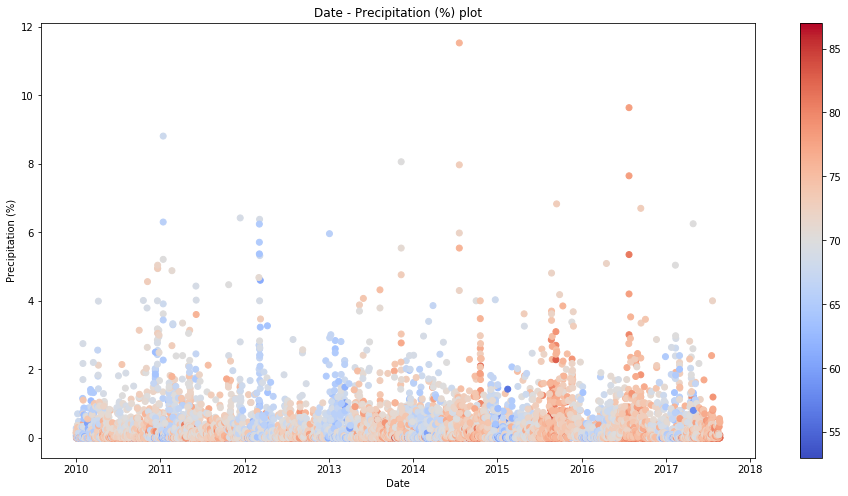

In [91]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(16,8))
plt.scatter(x=ms_dts, y=ms_pr, c=ms_tb, cmap = cm.coolwarm)
plt.xlabel('Date')
plt.ylabel('Precipitation (%)')
plt.title('Date - Precipitation (%) plot')
plt.colorbar()
plt.show()

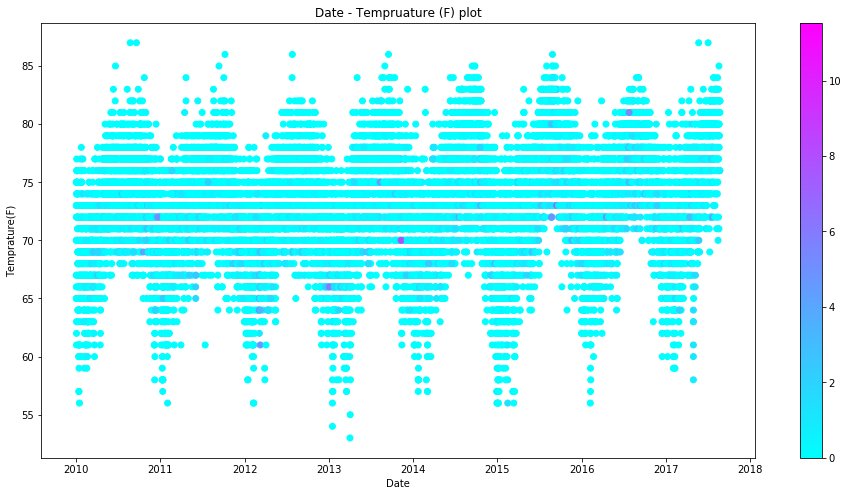

In [107]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(16,8))
plt.scatter(x=ms_dts, y=ms_tb, c=ms_pr, cmap = cm.cool, alpha=1)
plt.xlabel('Date')
plt.ylabel('Temprature(F)')
plt.title('Date - Tempruature (F) plot')
plt.colorbar()
plt.show()

In [90]:
cm.coolwarm

In [ ]:
cm.cool_r